<a href="https://colab.research.google.com/github/rookierohan10/Amazon-Sales-Analysis/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**


At first, we check and analyze the data to understand what kind of sales information it provides. The dataset gives information about sales from Amazon concerning various factors: Region, Country, Item Type, and Sales Channel. The dataset also provides information about the cost factors for individual products: Unit Price(i.e. the selling price of the product) and Unit Cost(i.e. the production cost of the product). We also received information about the total cost incurred by the company(inclusive of product cost and delivery charges) and the profit attained by the company.

We were to analyze the following the yearly, monthly, and yearly-monthly sales trends. Also, we were to analyze other factors that contribute to the revenue generated for the company.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing and Performing EDA on the dataset

At we continue with performing data cleaning and EDA on the dataset. We first check for information on the dataset, such as column names, column data types and statistical information about the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
amazon_data = pd.read_csv(r'/content/drive/MyDrive/CSVs/Amazon Sales data.csv')

In [5]:
amazon_data.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
amazon_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
amazon_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
amazon_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
#Changing the order date from string object to python datetime object
amazon_data['Order Date'] = pd.to_datetime(amazon_data['Order Date'])
amazon_data.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Analyzing the Dataset

The following charts illustrate the revenue generated by the company based on months and year.

## Showcasing month wise sales for each year from 2010 to mid-2017

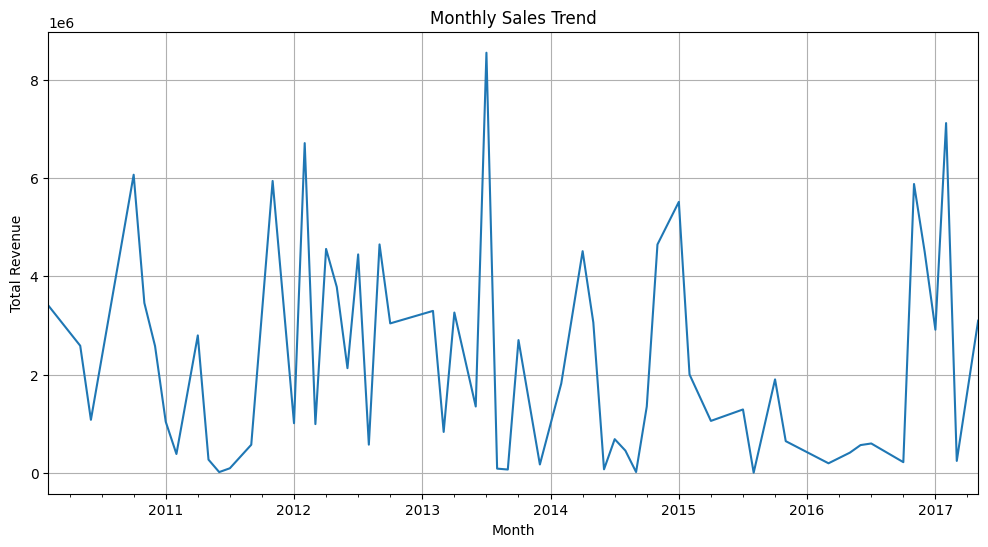

In [11]:
monthly_sales = amazon_data.groupby(amazon_data['Order Date'].dt.to_period("M"))['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

## Showcasing Yearly Revenue generated from 2010-2017

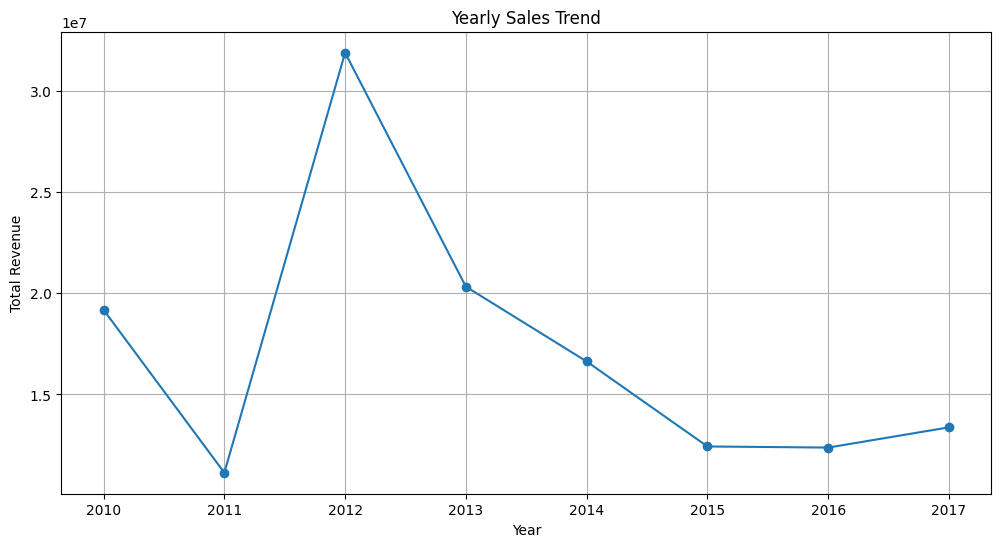

In [12]:
yearly_sales = amazon_data.groupby(amazon_data['Order Date'].dt.year)['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

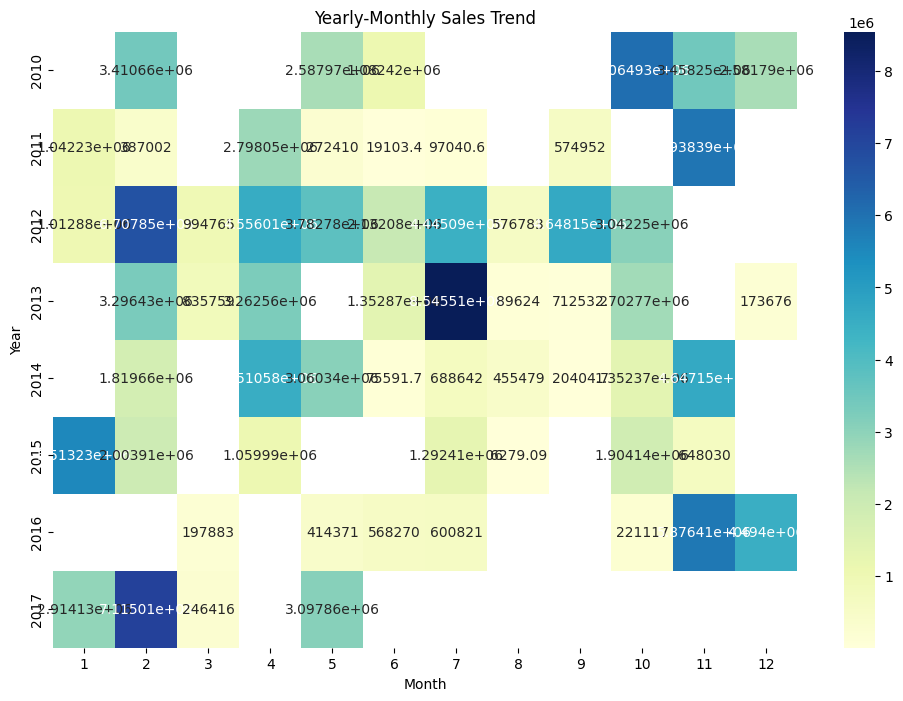

In [13]:
yearly_monthly_sales = amazon_data.groupby([amazon_data['Order Date'].dt.year, amazon_data['Order Date'].dt.month])['Total Revenue'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_monthly_sales, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

From the graph, we can notice that the highest revenue was generated in the month of May 2013, but the other months in 2013 have been relatively weak in terms of revenue generation. Coming to weak revenue generation, from the yearly sales graph, we can see that, there has been a significant fall in revenue in the years 2015 and 2016 in terms of revenue. Talking of yearly sales, 2012 all-over has been the best year for the company in terms of revenue generation.

## Showcasing Product sales based on tags

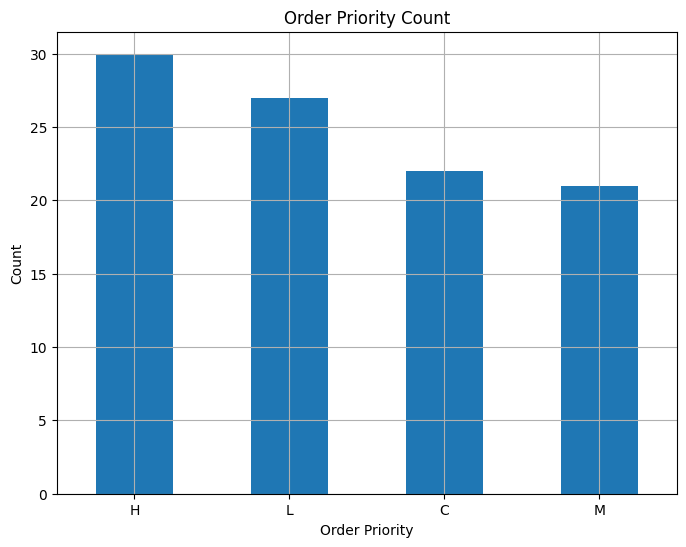

In [14]:
order_priority_count = amazon_data['Order Priority'].value_counts()
plt.figure(figsize=(8, 6))
order_priority_count.plot(kind='bar')
plt.title('Order Priority Count')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid()
plt.show()

The company, presumably(based on the dataset), has created tags for its products based on priority. Here, we are analyzing the product sales based on the above-said tags. We can see that, products tagged with priority have more in demand for the company.

## Calculating Yearly and Monthly Growth Rates

In [15]:
monthly_sales = amazon_data.groupby(amazon_data['Order Date'].dt.to_period("M"))['Total Revenue'].sum()
yearly_sales = amazon_data.groupby(amazon_data['Order Date'].dt.year)['Total Revenue'].sum()

monthly_growth_rate = monthly_sales.pct_change() * 100
yearly_growth_rate = yearly_sales.pct_change() * 100


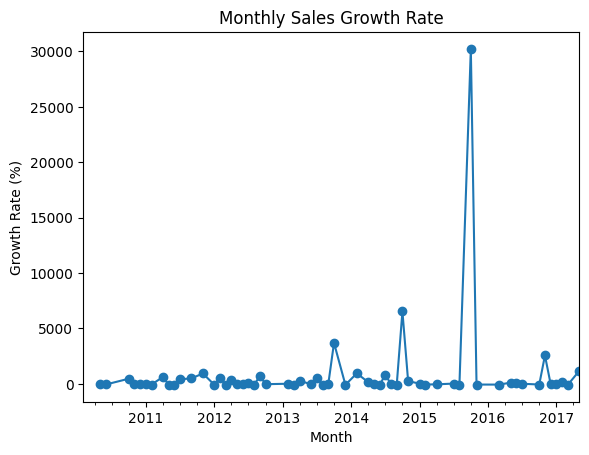

In [16]:
monthly_growth_rate.plot(kind='line', marker='o')
plt.title('Monthly Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.show()

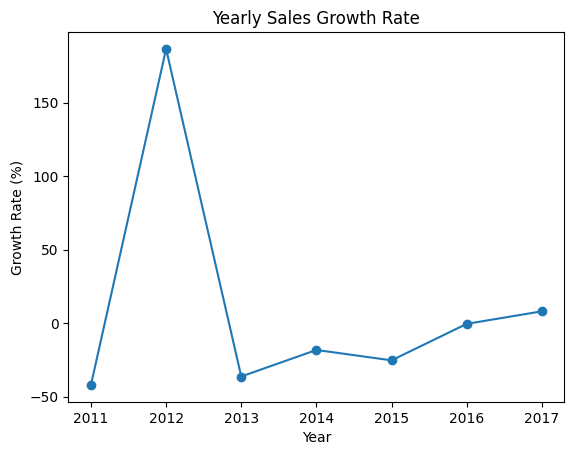

In [17]:
yearly_growth_rate.plot(kind='line', marker='o')
plt.title('Yearly Sales Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()

The above two graphs check and analyze the percentage growth rates from last month and year. We have seen earlier that 2012 has been the most booming year in the company, and the same is indicated in this graph as well. Sales growth has majorly increased from 2011 to 2012. We can also see a gradual increase in the sales growth rate between 2015 and 2017. Coming to monthly comparisons, there have been gradual ups and downs in the sales rate throughout all the years, but the later half of 2016 has seen a huge rise in sales rate.

## Average Order Value Analysis

Order Date
2010    1.918602e+06
2011    9.274305e+05
2012    1.449938e+06
2013    1.694204e+06
2014    1.108681e+06
2015    1.129817e+06
2016    1.237287e+06
2017    1.671677e+06
Name: Total Revenue, dtype: float64


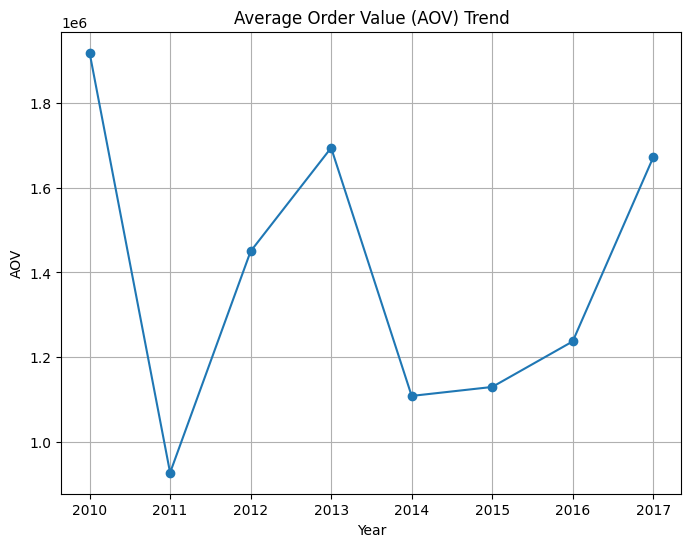

In [18]:
aov = amazon_data.groupby(amazon_data['Order Date'].dt.year)['Total Revenue'].mean()
print(aov)

plt.figure(figsize=(8, 6))
aov.plot(kind='line', marker='o')
plt.title('Average Order Value (AOV) Trend')
plt.xlabel('Year')
plt.ylabel('AOV')
plt.grid()
plt.show()


## Correlation Analysis between different metrics of the dataset

In [19]:
from scipy.stats import kruskal

regions = amazon_data['Region'].unique()
region_data = [amazon_data[amazon_data['Region'] == region]['Total Profit'] for region in regions]

statistic, p_value = kruskal(*region_data)

if p_value < 0.05:
    print(f"Kruskal-Wallis test: There is a significant relationship between 'Region' and 'Total Profit' (p-value={p_value})")
else:
    print(f"Kruskal-Wallis test: There is no significant relationship between 'Region' and 'Total Profit' (p-value={p_value})")


Kruskal-Wallis test: There is no significant relationship between 'Region' and 'Total Profit' (p-value=0.933634746630804)


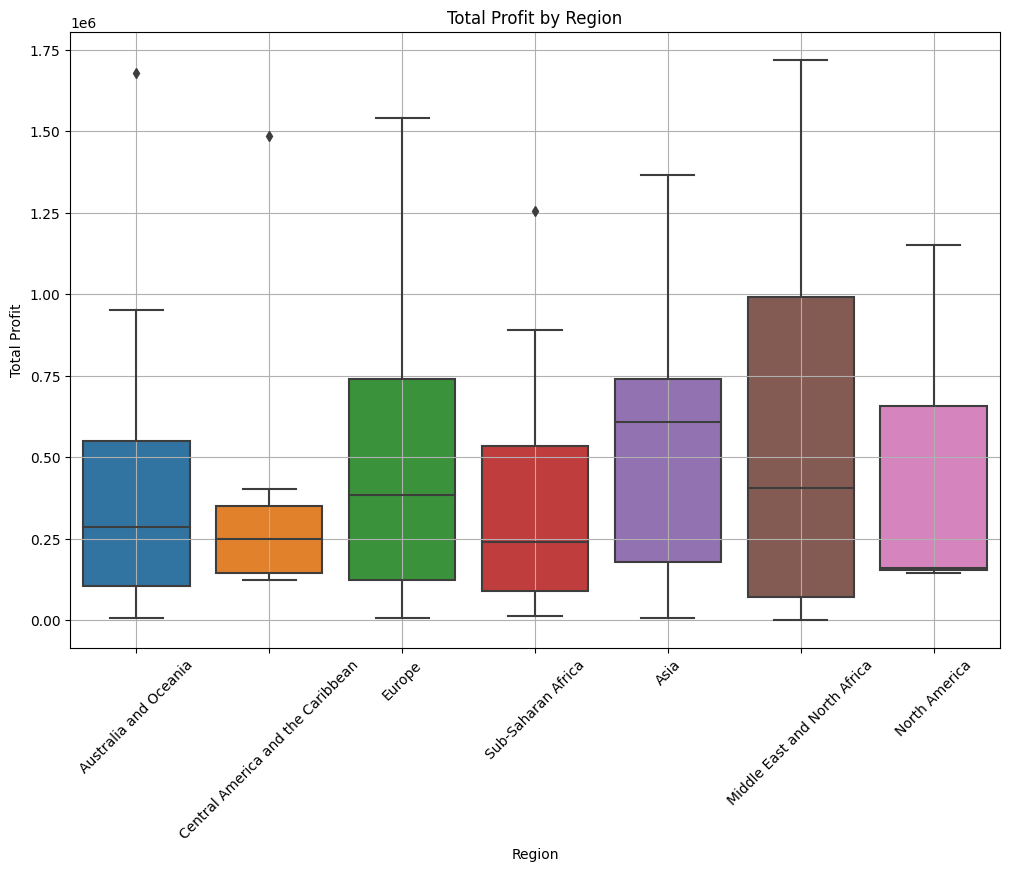

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Total Profit', data=amazon_data, order=regions)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [21]:
from scipy.stats import kruskal

regions = amazon_data['Item Type'].unique()
region_data = [amazon_data[amazon_data['Item Type'] == region]['Total Profit'] for region in regions]

statistic, p_value = kruskal(*region_data)

if p_value < 0.05:
    print(f"Kruskal-Wallis test: There is a significant relationship between 'Item Type' and 'Total Profit' (p-value={p_value})")
else:
    print(f"Kruskal-Wallis test: There is no significant relationship between 'Item Type' and 'Total Profit' (p-value={p_value})")


Kruskal-Wallis test: There is a significant relationship between 'Item Type' and 'Total Profit' (p-value=1.7901405146009343e-09)


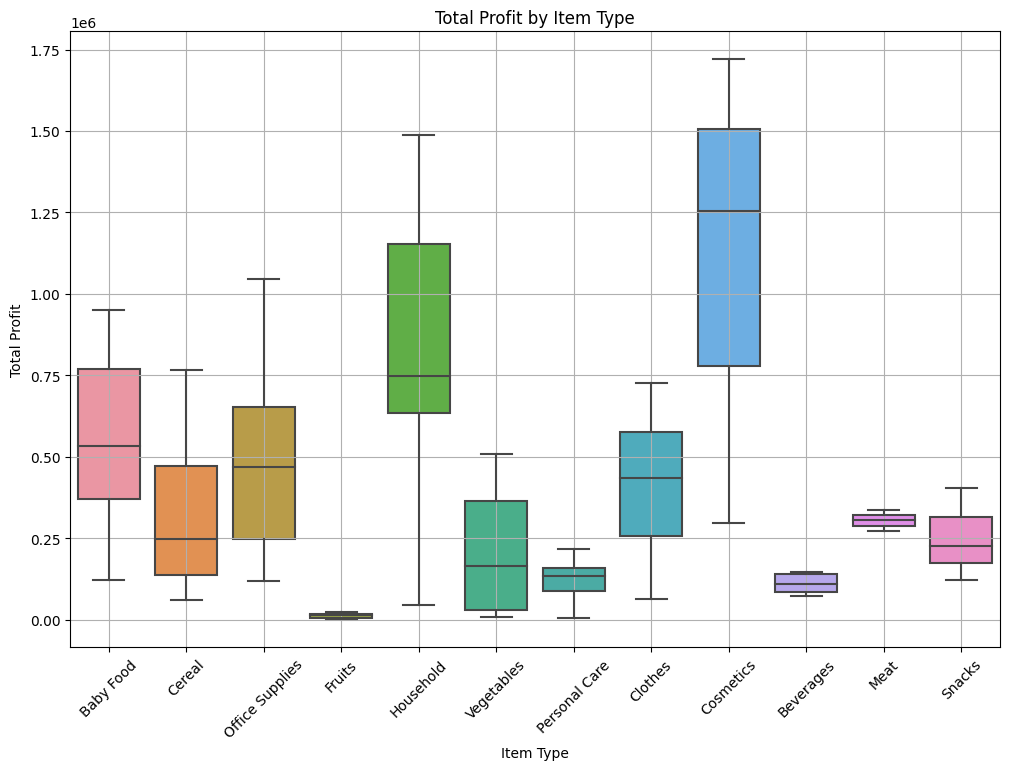

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Item Type', y='Total Profit', data=amazon_data, order=regions)
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [23]:
from scipy.stats import kruskal

regions = amazon_data['Sales Channel'].unique()
region_data = [amazon_data[amazon_data['Sales Channel'] == region]['Total Profit'] for region in regions]

statistic, p_value = kruskal(*region_data)

if p_value < 0.05:
    print(f"Kruskal-Wallis test: There is a significant relationship between 'Sales Channel' and 'Total Profit' (p-value={p_value})")
else:
    print(f"Kruskal-Wallis test: There is no significant relationship between 'Sales Channel' and 'Total Profit' (p-value={p_value})")


Kruskal-Wallis test: There is no significant relationship between 'Sales Channel' and 'Total Profit' (p-value=0.11440838410912593)


In this section, we are trying to analyze some factors that might be related to sales generated by the company. We are performing this testing using Kruskal-Wallis correlation analysis. There is no significant relationship between the region and sales channel concerning the company's revenue. However, product type has been a significant contributing factor in profit. We can see that cosmetics and household have been major contributing factors towards profits and sales; beverages, meat, and fruits have been the lowest grocers on the website.

## Checking if Total Profit can be predicted from the Total Revenue

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = amazon_data.groupby(amazon_data['Order Date'].dt.to_period('M'))[['Total Revenue']].mean()
y = amazon_data.groupby(amazon_data['Order Date'].dt.to_period('M'))['Total Profit'].mean()

In [25]:
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f'Linear Regression Equation: Total Profit = {slope:.4f} * Total Revenue + {intercept:.4f}')

Linear Regression Equation: Total Profit = 0.2743 * Total Revenue + 64624.4872


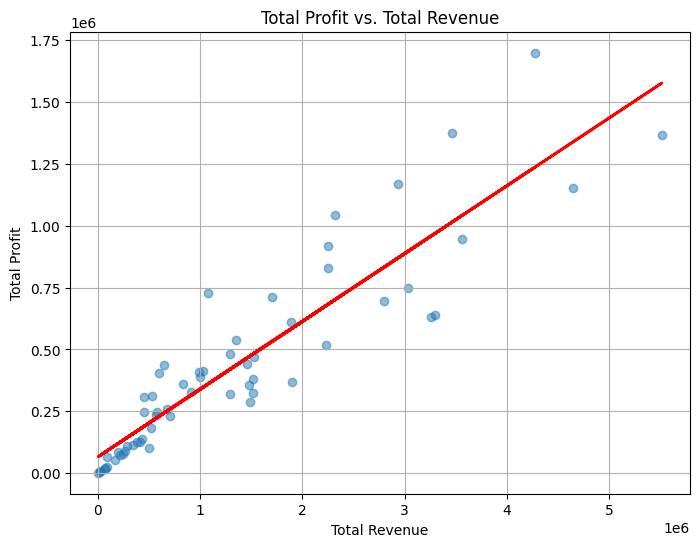

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(amazon_data.groupby(amazon_data['Order Date'].dt.to_period('M'))[['Total Revenue']].mean(), amazon_data.groupby(amazon_data['Order Date'].dt.to_period('M'))[['Total Profit']].mean(), alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Total Profit vs. Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.grid()
plt.show()

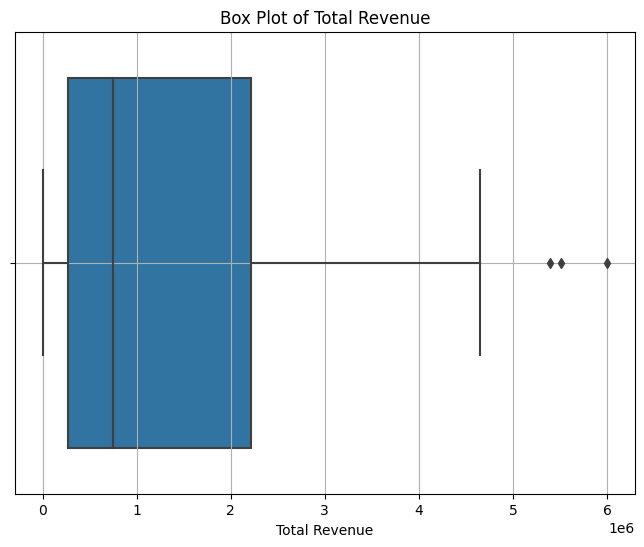

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total Revenue', data=amazon_data)
plt.title('Box Plot of Total Revenue')
plt.grid()
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.preprocessing import StandardScaler

            Total Revenue
Order Date               
2010-02      1.705331e+06
2010-05      1.293987e+06
2010-06      1.082418e+06
2010-10      3.032467e+06
2010-11      3.458252e+06
2010-12      1.290893e+06
2011-01      5.211127e+05
2011-02      3.870022e+05
2011-04      2.798046e+06
2011-05      2.724105e+05
2011-06      1.910344e+04
2011-07      9.704064e+04
2011-09      5.749519e+05
2011-11      1.484596e+06
2012-01      5.064420e+05
2012-02      2.235950e+06
2012-03      9.947654e+05
2012-04      1.518671e+06
2012-05      1.891391e+06
2012-06      7.106918e+05
2012-07      1.481698e+06
2012-08      5.767828e+05
2012-09      2.324076e+06
2012-10      1.521123e+06
2013-02      3.296425e+06
2013-03      8.357591e+05
2013-04      3.262562e+06
2013-06      6.764337e+05
2013-07      4.272756e+06
2013-08      8.962398e+04
2013-09      7.125321e+04
2013-10      1.351385e+06
2013-12      1.736762e+05
2014-02      9.098301e+05
2014-04      2.255289e+06
2014-05      1.530169e+06
2014-06     

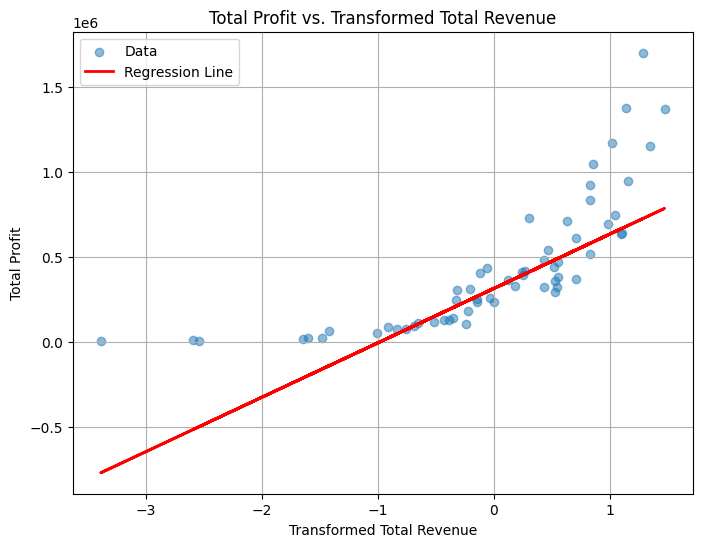

In [29]:
X_transformed = X.copy()
print(X_transformed)
X_transformed['Total Revenue'] = X_transformed['Total Revenue'].apply(lambda x: np.log(x) if x > 0 else 0)
X_transformed = StandardScaler().fit_transform(X_transformed)

model = TheilSenRegressor()
model.fit(X_transformed, y)

plt.figure(figsize=(8, 6))

plt.scatter(X_transformed, y, alpha=0.5, label='Data')

plt.plot(X_transformed, model.predict(X_transformed), color='red', linewidth=2, label='Regression Line')

plt.title('Total Profit vs. Transformed Total Revenue')
plt.xlabel('Transformed Total Revenue')
plt.ylabel('Total Profit')
plt.legend()
plt.grid()
plt.show()

Here we are trying to derive a relation between the revenue generated and the total profit earned by the company by applying simple linear regression. In order to deal with outliers in the date we further apply log transformation to the revenue column and apply theilsen regressor on the dataset.

## Performing Hypotheses Analysis

### Testing the impact of sales channel on the total revenue

In [30]:
channels = amazon_data['Sales Channel'].unique()

In [31]:
import scipy.stats as stats

offline_channel = amazon_data[amazon_data['Sales Channel'] == 'Offline']['Total Revenue']
online_channel = amazon_data[amazon_data['Sales Channel'] == 'Online']['Total Revenue']

t_stat, p_value = stats.ttest_ind(offline_channel, online_channel)

alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis. There is a statistically significant difference in sales.")
else:
    print(f"Fail to reject the null hypothesis. There is no statistically significant difference in sales.")

Fail to reject the null hypothesis. There is no statistically significant difference in sales.


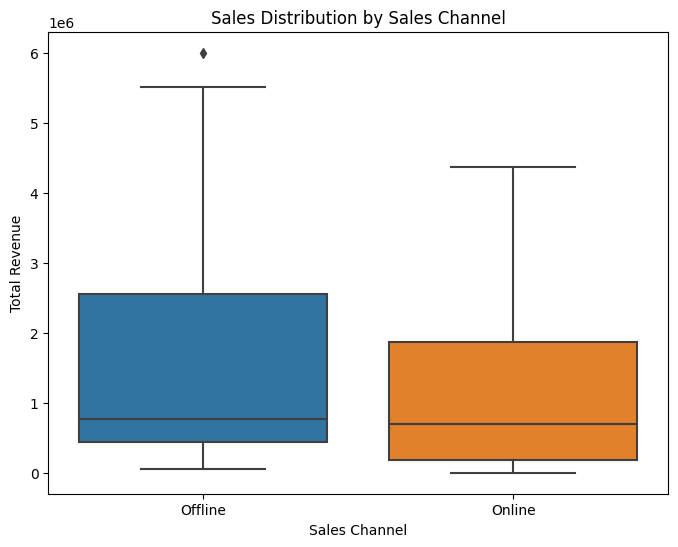

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales Channel', y='Total Revenue', data=amazon_data)
plt.title('Sales Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

## Comparing Year-wise Total Revenue and Total Profit

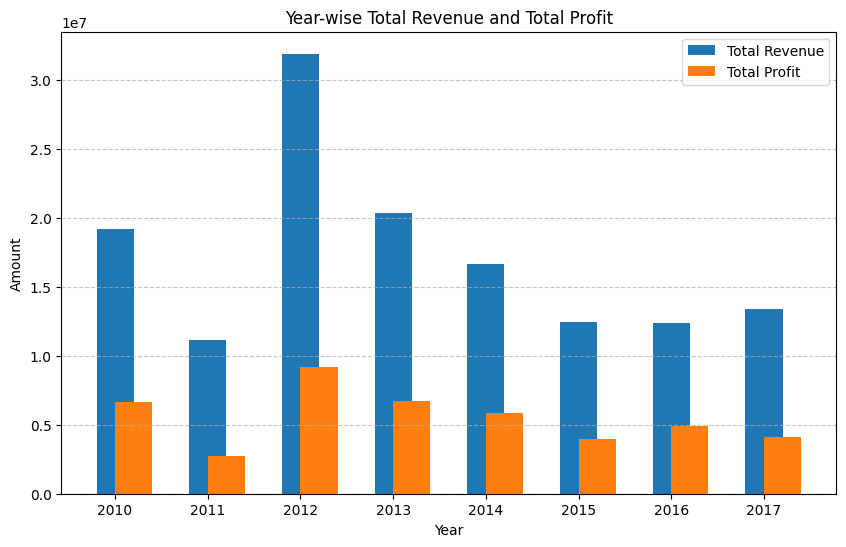

In [33]:
amazon_data['Year'] = amazon_data['Order Date'].dt.year

yearly_revenue = amazon_data.groupby('Year')['Total Revenue'].sum()
yearly_profit = amazon_data.groupby('Year')['Total Profit'].sum()

plt.figure(figsize=(10, 6))
plt.bar(yearly_revenue.index, yearly_revenue, label='Total Revenue', width=0.4, align='center')
plt.bar(yearly_profit.index, yearly_profit, label='Total Profit', width=0.4, align='edge')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Year-wise Total Revenue and Total Profit')
plt.xticks(yearly_revenue.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


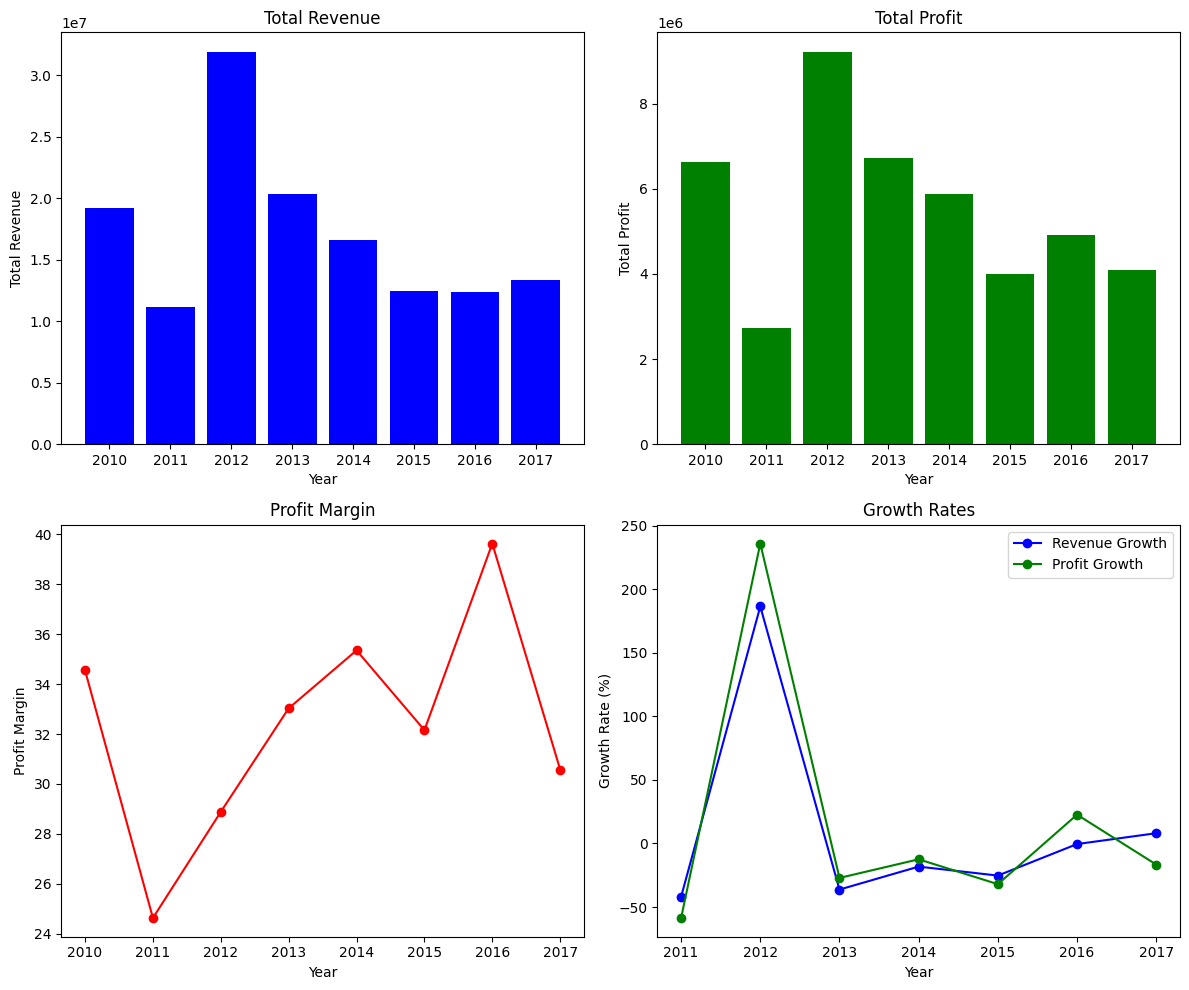

In [34]:
amazon_data['Year'] = amazon_data['Order Date'].dt.year

yearly_revenue = amazon_data.groupby('Year')['Total Revenue'].sum()
yearly_profit = amazon_data.groupby('Year')['Total Profit'].sum()

profit_margin = (yearly_profit / yearly_revenue) * 100

revenue_growth_rate = yearly_revenue.pct_change() * 100
profit_growth_rate = yearly_profit.pct_change() * 100

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].bar(yearly_revenue.index, yearly_revenue, color='blue')
axes[0, 0].set_title('Total Revenue')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Revenue')

axes[0, 1].bar(yearly_profit.index, yearly_profit, color='green')
axes[0, 1].set_title('Total Profit')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Profit')

axes[1, 0].plot(profit_margin.index, profit_margin, marker='o', color='red')
axes[1, 0].set_title('Profit Margin')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Profit Margin')

axes[1, 1].plot(revenue_growth_rate.index, revenue_growth_rate, marker='o', label='Revenue Growth', color='blue')
axes[1, 1].plot(profit_growth_rate.index, profit_growth_rate, marker='o', label='Profit Growth', color='green')
axes[1, 1].set_title('Growth Rates')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Growth Rate (%)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


This is yet another set of visualizations to denote the sales of the company across the years. The third graph calculates and illustrates the profit margin for the comany. While the amount of revenue has been high in total in 2012, we see however that the same year did not contribute much in terms of profit. Surprisingly enough, 2016, the year least in terms of revenue has generated the most amount of profit comparatively.

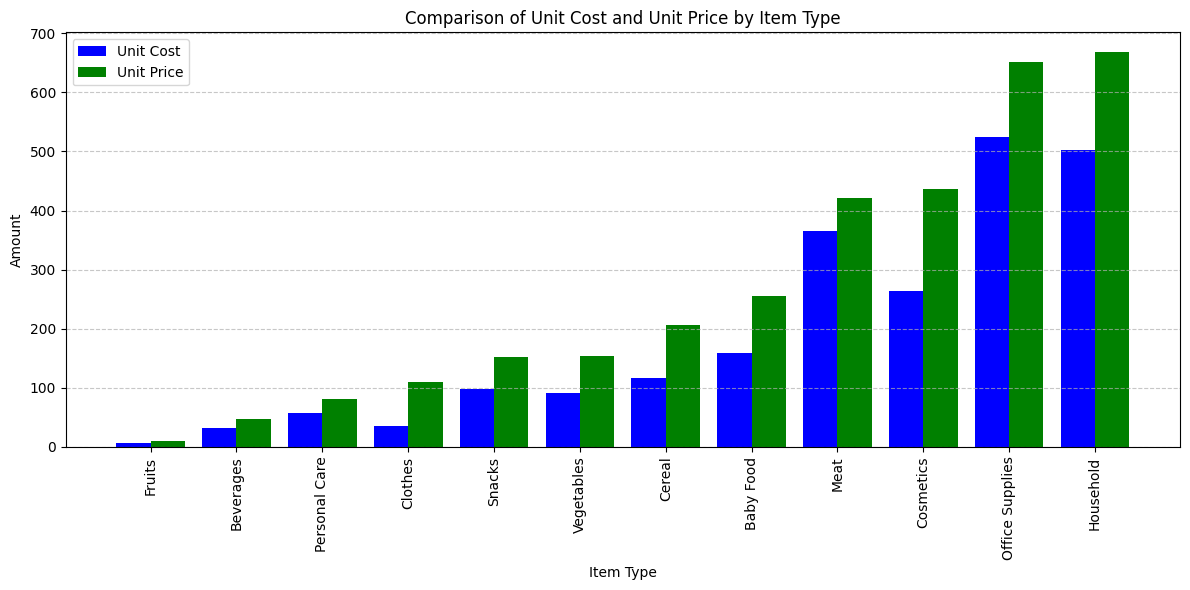

In [35]:
item_type_data = amazon_data.groupby('Item Type')[['Unit Cost', 'Unit Price']].mean().reset_index()

item_type_data = item_type_data.sort_values(by='Unit Price')

plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(item_type_data))
plt.bar(index, item_type_data['Unit Cost'], bar_width, label='Unit Cost', color='b')
plt.bar([i + bar_width for i in index], item_type_data['Unit Price'], bar_width, label='Unit Price', color='g')
plt.xlabel('Item Type')
plt.ylabel('Amount')
plt.title('Comparison of Unit Cost and Unit Price by Item Type')
plt.xticks([i + bar_width / 2 for i in index], item_type_data['Item Type'], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyzing the Speed of Delivery

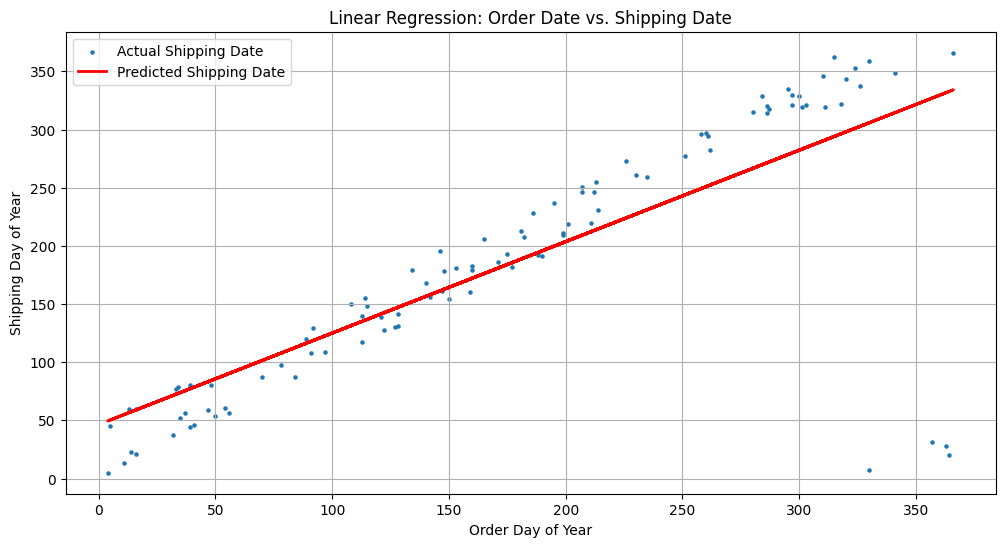

Linear Regression Equation: Shipping Day = 0.7862 * Order Day + 46.3926


In [36]:
amazon_data['Ship Date'] = pd.to_datetime(amazon_data['Ship Date'])

amazon_data['Shipping Time'] = (amazon_data['Ship Date'] - amazon_data['Order Date']).dt.days

amazon_data['Order Day of Year'] = amazon_data['Order Date'].dt.dayofyear
amazon_data['Ship Day of Year'] = amazon_data['Ship Date'].dt.dayofyear

regression_model = LinearRegression()
X = amazon_data['Order Day of Year'].values.reshape(-1, 1)
y = amazon_data['Ship Day of Year'].values
regression_model.fit(X, y)

predicted_ship_dates = regression_model.predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(amazon_data['Order Day of Year'], amazon_data['Ship Day of Year'], label='Actual Shipping Date', s=5)
plt.plot(amazon_data['Order Day of Year'], predicted_ship_dates, color='red', label='Predicted Shipping Date', linewidth=2)
plt.title('Linear Regression: Order Date vs. Shipping Date')
plt.xlabel('Order Day of Year')
plt.ylabel('Shipping Day of Year')
plt.legend()
plt.grid()
plt.show()

slope = regression_model.coef_[0]
intercept = regression_model.intercept_
print(f'Linear Regression Equation: Shipping Day = {slope:.4f} * Order Day + {intercept:.4f}')


In [37]:
average_shipping_time = amazon_data['Shipping Time'].mean()

print(f"The average shipping time is {average_shipping_time:.2f} days.")

The average shipping time is 23.36 days.
